### EDA

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
import missingno as ms
from datetime import datetime
from pandas_profiling import ProfileReport

pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)
pd.set_option("display.float_format", "{:.2f}".format)


In [111]:
contact_df = pd.read_excel('Take_Home_Test_-_Data_Analyst.xlsx','Contact Info')
nps_df = pd.read_excel('Take_Home_Test_-_Data_Analyst.xlsx','NPS')

**Decidi fazer um merge dos dados para ficar mais fácil a análise**

In [112]:
df = pd.merge(contact_df, nps_df, how = 'inner', on = 'Contact ID')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114892 entries, 0 to 114891
Data columns (total 11 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Contact ID                         114892 non-null  int64 
 1   Tipo de Usuário                    114892 non-null  object
 2   Canal                              114892 non-null  object
 3   Contact Reason                     114892 non-null  object
 4   MCC                                114892 non-null  object
 5   TMA                                114892 non-null  object
 6   AFTER CALL WORK TIME               114892 non-null  object
 7   Data                               114892 non-null  object
 8   Nota pesquisa NPS                  114892 non-null  int64 
 9   O que te motivou a dar esta nota?  114282 non-null  object
 10  AgentID                            114892 non-null  object
dtypes: int64(2), object(9)
memory usage: 10.5+ MB


**Verificar os campos nulos**

In [5]:
df.isnull().sum()

Contact ID                             0
Tipo de Usuário                        0
Canal                                  0
Contact Reason                         0
MCC                                    0
TMA                                    0
AFTER CALL WORK TIME                   0
Data                                   0
Nota pesquisa NPS                      0
O que te motivou a dar esta nota?    610
AgentID                                0
dtype: int64

**Existem 610 nulos/brancos para a motivação das notas.**

In [6]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
    missing_percent = round(missing_percent,2)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

**53% dos dados estão faltando. Seria interessante verificar com o cliente em relação aos dados faltantes**

In [7]:
missing(df)

,Missing_Number,Missing_Percent
O que te motivou a dar esta nota?,610,0.53
Contact ID,0,0.00
Tipo de Usuário,0,0.00
Canal,0,0.00
Contact Reason,0,0.00
MCC,0,0.00
TMA,0,0.00
AFTER CALL WORK TIME,0,0.00
Data,0,0.00
Nota pesquisa NPS,0,0.00


In [8]:
df.head()

,Contact ID,Tipo de Usuário,Canal,Contact Reason,MCC,TMA,AFTER CALL WORK TIME,Data,Nota pesquisa NPS,O que te motivou a dar esta nota?,AgentID
0,87237,Usuario Tipo 1,Canal Entrada 5,Motivo 5,MCC 2,00:12:41,00:01:06,dia 1,-1,Razão 3\nRazão 1,Ag_71
1,87238,Usuario Tipo 1,Canal Entrada 5,Motivo 18,MCC 9,00:05:49,00:01:01,dia 1,-1,Razão 3,Ag_94
2,87239,Usuario Tipo 1,Canal Entrada 5,Motivo 20,MCC 2,00:08:00,00:01:12,dia 1,-1,Razão 3,Ag_144
3,87240,Usuario Tipo 1,Canal Entrada 5,Motivo 20,MCC 5,00:02:18,00:00:13,dia 1,-1,Razão 3\nRazão 1\nRazão 2,Ag_53
4,87242,Usuario Tipo 1,Canal Entrada 5,Motivo 2,MCC 5,00:02:34,00:01:46,dia 1,9,Razão 3\nRazão 1\nRazão 2,Ag_142


In [9]:
df.shape

(114892, 11)

## Vamos analisar o cálculo de NPS.

**Categorização do calculo NPS, quantos são promoters, detratores, total responses e valor real do NPS.**
 
**Detratores (de 0 a 6): são clientes insatisfeitos que podem falar mal das empresas para outras pessoas e não realizar novas compras.**

**Neutros ou passivos (7 ou 8): são clientes satisfeitos com uma empresa ou produtos, mas que não chegam a amá-la. Se o produto de outra loja chamar atenção, eles podem comprar em seu concorrente facilmente.**

**Promotores (9 ou 10): são fãs da  empresa, muito mais propensos a recomendar seus produtos para os outros, permanecer como clientes e gastar mais dinheiro com novas compras.**

**Calculo de NPS = Promotores – Detratores/Número total de respondentes.**

In [128]:
total = df['Nota pesquisa NPS'].sum()
total

279994

In [131]:
filtrop = df[df['Nota pesquisa NPS'] >= 9 ]

promotores = filtrop['Nota pesquisa NPS'].value_counts().to_frame()

total_promotores = promotores.sum()
total_promotores = (total/total_promotores) / 100
total_promotores

Nota pesquisa NPS   0.10
dtype: float64

In [132]:
fdetratores = df[(df['Nota pesquisa NPS'] >= 0) & (df['Nota pesquisa NPS'] <= 6) ]

detratores = fdetratores['Nota pesquisa NPS'].value_counts().to_frame()
total_detratores = detratores.sum()
total_detratores = (total/total_detratores) / 100
total_detratores

Nota pesquisa NPS   0.19
dtype: float64

In [133]:
nps = total_promotores - total_detratores
nps

Nota pesquisa NPS   -0.10
dtype: float64

### Uma nota negativa para o NPS significa ter mais detratores do que promotores, o que para o negócio é muito ruim.

Zona de excelência - 75 a 100: marcas que transmitem experiências altamente positivas e relevantes para seus clientes. Possuem pouquíssimos clientes detratores e os processos estratégicos geram alto valor para o público.

Zona de qualidade - 50 a 74: Essa zona de NPS é uma boa avaliação, mas, neste caso, a empresa apresenta alguns pontos de melhoria. Vale ficar de olho nas oportunidades de crescimento e nos gaps que podem se tornar novas entregas de valor para o cliente.

Zona de aperfeiçoamento - 0 a 49: Essa pontuação indica que há muitos pontos a serem ajustados pela empresa e que o seu cliente não está satisfeito com a experiência. Aproveite o retorno dessas pessoas para aprimorar todas as etapas de venda e, principalmente, pós-venda.

## Zona crítica -100 a -1: Sim, existe NPS negativo, quando o % de detratores é maior do que o de promotores. Esse é um nível de alerta máximo para empresa. Significa que o público tem alto potencial de falar mal da sua marca. É importante repensar toda a estratégia de negócio para reverter essa situação.

ref: https://www.sydle.com/br/blog/nps-como-funciona-5f344f0f1a9e2671048b3601/

**Um pouco mais de data cleaning, trocar os nulos por ? e mudar a formataçao do TMA e After Call WorkTime e apresentar um pouco de visualização**

In [114]:
df['AFTER CALL WORK TIME'] = df['AFTER CALL WORK TIME'].apply(lambda time:time.strftime("%H:%M:%S"))
df['TMA'] = df['TMA'].apply(lambda time:time.strftime("%H:%M:%S"))

In [16]:
df['O que te motivou a dar esta nota?'] = df['O que te motivou a dar esta nota?'].fillna('?')

In [17]:
df = df.assign(Reason=lambda x:df['O que te motivou a dar esta nota?'].apply(lambda x: x.split('\n')[0]))

**O que motivou a ter notas baixas para o NPS?**

In [18]:
df.Reason.value_counts()

Razão 3    69756
Razão 1    35832
Razão 2     8694
?            610
Name: Reason, dtype: int64

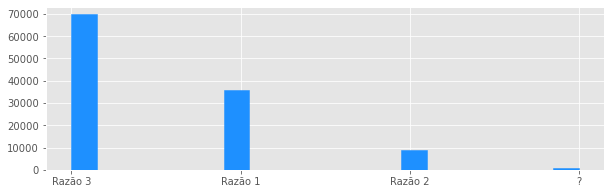

In [34]:
plt.figure(figsize=(10,3))
plt.hist(df['Reason'],
        facecolor = 'DodgerBlue',
        edgecolor = 'DodgerBlue',
        bins = 20)
plt.show()

**Notei que existem muitas notas -1 o que está fora do padrão de cálculo de NPS, estão caso esse dado esteja incorreto na fonte , qual seria as notas voltadas a razão que atualmente tem maior reclamação**

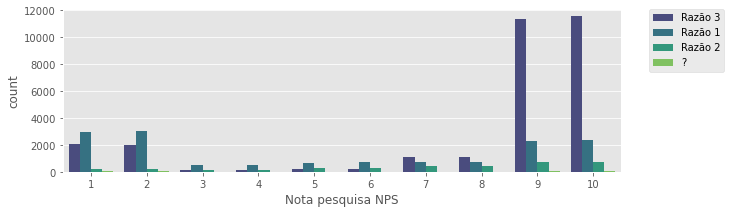

In [21]:
filtro = (df["Nota pesquisa NPS"] != -1)
temp_df = df[filtro]

plt.figure(figsize=(10,3))  
sns.countplot(x='Nota pesquisa NPS',data=temp_df,hue='Reason',palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Foi verificado tambem que dado as notas -1 é possivel ver também que o TMA para a razão 3 está acima de 23:42:30, o que não parece muito comum então possívelmente dado esteja incorreto, necessidade de validação com o cliente**

In [22]:
filtro = (df["Nota pesquisa NPS"] == -1)
temp_df = df[filtro]
temp_df.groupby(by=['Reason','TMA']).count()['Nota pesquisa NPS']

Reason   TMA     
?        00:01:00    1
         00:01:01    1
         00:01:02    1
         00:01:03    1
         00:01:04    1
                    ..
Razão 3  23:42:30    1
         23:45:00    1
         23:47:30    1
         23:51:40    1
         23:59:10    1
Name: Nota pesquisa NPS, Length: 6643, dtype: int64

In [80]:
df.groupby('AgentID')['TMA'].value_counts()

AgentID  TMA     
Ag_1     00:02:20    3
         00:03:55    3
         00:01:10    2
         00:01:15    2
         00:01:19    2
                    ..
Ag_99    08:56:40    1
         09:14:10    1
         09:55:50    1
         10:58:20    1
         17:22:30    1
Name: TMA, Length: 95519, dtype: int64

In [103]:
byagentTMA = df.groupby('TMA')['AgentID'].value_counts()
byagentTMA

TMA       AgentID
00:01:00  Ag_34      3
          Ag_67      3
          Ag_131     2
          Ag_185     2
          Ag_227     2
                    ..
23:54:10  Ag_275     1
23:55:50  Ag_295     1
23:57:30  Ag_289     1
          Ag_394     1
23:59:10  Ag_4       1
Name: AgentID, Length: 95519, dtype: int64

In [105]:
byagentafcw = df.groupby('AFTER CALL WORK TIME')['AgentID'].value_counts()
byagentafcw

AFTER CALL WORK TIME  AgentID
00:00:00              Ag_387     267
                      Ag_172     260
                      Ag_256     260
                      Ag_262     259
                      Ag_259     254
                                ... 
01:14:38              Ag_356       1
01:29:46              Ag_268       1
01:54:46              Ag_190       1
02:04:47              Ag_329       1
21:59:31              Ag_5         1
Name: AgentID, Length: 18170, dtype: int64

In [134]:
#Qual o canal de contato com o cliente para pesquisa de NPS?
df['Canal'].value_counts()

Canal Entrada 3    52270
Canal Entrada 5    28655
Canal Entrada 2    21861
Canal Entrada 1     9603
Canal Entrada 4     2503
Name: Canal, dtype: int64

Verificações a serem feitas para melhoria do NPS. 

# Momento em que é enviado a pesquisa.

- Pode ser que o cliente ainda não tenha tido tempo suficiente para testar o produto e serviço. Existem dois caminhos mais prováveis: ele não vai responder, porque ainda não tem um posicionamento ou ele vai responder, mas de uma forma que não reflete a sua opinião. O tempo certo para enviar a pergunta decisiva depende do ciclo de vida de cada produto. Em geral, a dica é dar ao consumidor um prazo de uma a duas semanas antes de mandar o NPS. 

# Acerte o canal

- Existem muitos canais diferentes que uma empresa pode utilizar para enviar a pergunta do 
NPS para os seus clientes: pode ser por SMS, WhatsApp, ligação, e-mail, direct no Instagram, Messenger, plataformas e tantos outros. 
    
- É fundamental saber qual é o canal de comunicação que esse cliente mais utiliza, que ele vai de fato receber a mensagem para poder responder. Para identificar isso, não tem outro jeito: você precisa conhecer o seu público-alvo, precisa saber de que forma ele se comunica e em quais canais é mais ativo. 
De nada adianta enviar a pergunta decisiva por e-mail para alguém que nunca checa a sua caixa de entrada, é totalmente contraproducente. Se a sua empresa já dedicou um tempo a pesquisar sobre o público-alvo e construir a persona, já está muitos passos à frente da concorrência. Se esse caminho ainda não foi percorrido, é importante investir nesse processo antes de começar o NPS.

fonte: https://amplifique.me/blog/como-aumentar-a-taxa-de-resposta-do-nps/